# TCT - Day 14

- Connect to SQL database from python
- Visualization using matplotlib
- Example polynomial regression

##  Connect to SQL database from python

In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pyodbc 

In [3]:
import login_sql_details

In [4]:
from login_sql_details import get_details

In [5]:
server,database, un, psw = get_details()

In [8]:
con=pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}',SERVER=server,DATABASE=database,UID=un,PWD=psw)

In [9]:
query = """
SELECT TOP (1000) [BusinessEntityID]
      ,[Name]
      ,[SalesPersonID]
      ,[Demographics]
      ,[rowguid]
      ,[ModifiedDate]
  FROM [Sales].[Store]
"""

In [10]:
data=pd.read_sql(query,con)
data

,BusinessEntityID,Name,SalesPersonID,Demographics,rowguid,ModifiedDate
0,292,Next-Door Bike Store,279,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",A22517E3-848D-4EBE-B9D9-7437F3432304,2014-09-12 11:15:07.497
1,294,Professional Sales and Service,276,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",B50CA50B-C601-4A13-B07E-2C63862D71B4,2014-09-12 11:15:07.497
2,296,Riders Company,277,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",337C3688-1339-4E1A-A08A-B54B23566E49,2014-09-12 11:15:07.497
3,298,The Bike Mechanics,275,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",7894F278-F0C8-4D16-BD75-213FDBF13023,2014-09-12 11:15:07.497
4,300,Nationwide Supply,286,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",C3FC9705-A8C4-4F3A-9550-EB2FA4B7B64D,2014-09-12 11:15:07.497
...,...,...,...,...,...,...
696,1988,Retreat Inn,282,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",EA21EC81-1BFA-4A07-9B4D-73D9852AFCBF,2014-09-12 11:15:07.497
697,1990,Technical Parts Manufacturing,281,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",C8E3C4ED-8F58-4DB2-B600-E0CD11D9CFAD,2014-09-12 11:15:07.497
698,1992,Totes & Baskets Company,277,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",CE860B58-643C-4567-BFD8-06E97969CC67,2014-09-12 11:15:07.497
699,1994,World of Bikes,277,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",0C10F2B6-A13A-440C-9C25-5B28D482872A,2014-09-12 11:15:07.497


## Visualization using matplotlib

In [12]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

In [17]:
t = yf.Ticker('TSLA')

In [21]:
data=t.history(period='2Y',interval='1d')

In [22]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-24,198.822006,200.175995,190.628006,192.169998,54798000,0,0.0
2020-06-25,190.854004,197.195999,187.429993,197.195999,46272500,0,0.0
2020-06-26,198.955994,199.000000,190.973999,191.947998,44274500,0,0.0
2020-06-29,193.802002,202.000000,189.703995,201.869995,45132000,0,0.0
2020-06-30,201.300003,217.537994,200.746002,215.962006,84592500,0,0.0


In [25]:
data.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-10,705.469971,718.500000,683.739990,696.690002,32512200,0,0.0
2022-06-13,669.500000,679.900024,644.049988,647.210022,34255800,0,0.0
2022-06-14,654.859985,678.989990,635.210022,662.669983,32662900,0,0.0
2022-06-15,662.750000,706.989990,654.450012,699.000000,39710600,0,0.0
2022-06-16,668.210022,675.500000,626.080017,639.299988,35796900,0,0.0
2022-06-17,640.299988,662.909973,639.590027,650.280029,30810900,0,0.0
2022-06-21,673.809998,730.729980,673.000000,711.109985,40931000,0,0.0
2022-06-22,703.510010,740.500000,701.479980,708.260010,33702500,0,0.0
2022-06-23,713.719971,717.950012,685.909973,705.210022,34667500,0,0.0


In [23]:
data.shape

(505, 7)

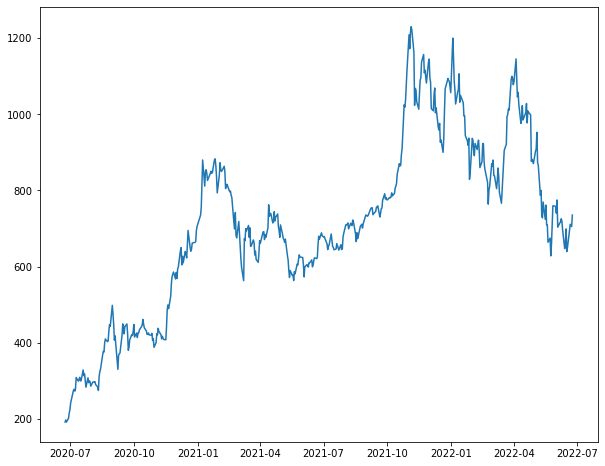

In [27]:
plt.figure(figsize=(10,8))
plt.plot(data['Close'])

In [28]:
#exercise1: create e new column to calcualte the stock return. Use column Close and apply function pct_change()

In [31]:
data['Return']=data['Close'].pct_change()*100

In [32]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
Date,,,,,,,,
2020-06-24,198.822006,200.175995,190.628006,192.169998,54798000,0,0.0,NaN
2020-06-25,190.854004,197.195999,187.429993,197.195999,46272500,0,0.0,2.615393
2020-06-26,198.955994,199.000000,190.973999,191.947998,44274500,0,0.0,-2.661312
2020-06-29,193.802002,202.000000,189.703995,201.869995,45132000,0,0.0,5.169107
2020-06-30,201.300003,217.537994,200.746002,215.962006,84592500,0,0.0,6.980736


In [33]:
#exercise2: create 2 dataframes, one with all positive returns and one all negative returns 

In [34]:
pos_return=data[data['Return']>0]
neg_return=data[data['Return']<0]

In [35]:
pos_return.shape, neg_return.shape

((275, 8), (229, 8))

In [37]:
pos_return.Return.mean(),neg_return.Return.mean()

(3.156110665703477, -3.008439912357088)

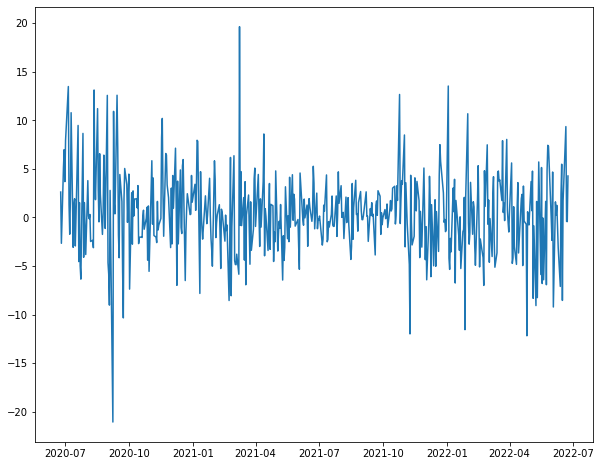

In [38]:
plt.figure(figsize=(10,8))
plt.plot(data['Return'])

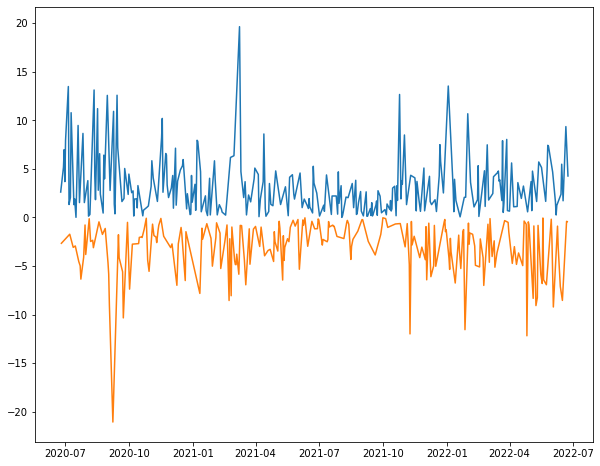

In [39]:
plt.figure(figsize=(10,8))
plt.plot(pos_return['Return'])
plt.plot(neg_return['Return'])
plt.show()

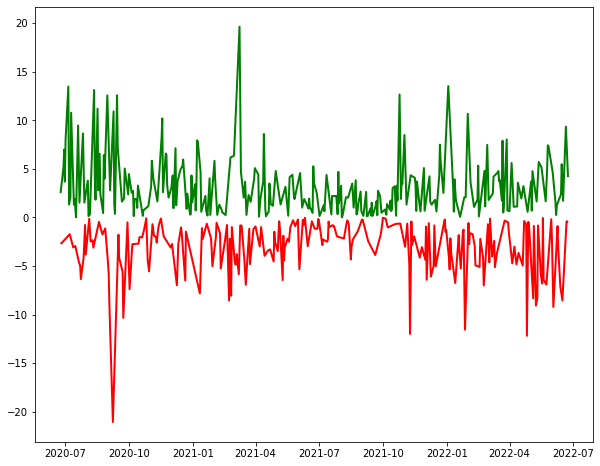

In [42]:
plt.figure(figsize=(10,8))
plt.plot(pos_return['Return'],linewidth=2,color='g')
plt.plot(neg_return['Return'],linewidth=2,color='r')
plt.show()

## Example polynomial regression

In [45]:
import numpy as np

In [43]:
d = {'Load': [10,25,50,75,100], 'SFOC': [352.29, 268.95,232.05,212.77,194.20]}

In [46]:
df=pd.DataFrame(d)

In [47]:
df

,Load,SFOC
0,10,352.29
1,25,268.95
2,50,232.05
3,75,212.77
4,100,194.20


In [50]:
poly_fit_3=np.polyfit(df['Load'],df['SFOC'],3)

In [51]:
poly_fit_3

array([-6.21128839e-04,  1.26955251e-01, -8.81087264e+00,  4.25823069e+02])

In [52]:
poly_fit_4=np.polyfit(df['Load'],df['SFOC'],4)

In [53]:
poly_fit_4

array([ 1.30221766e-05, -3.43591749e-03,  3.26012114e-01, -1.39468422e+01,
        4.62462906e+02])

In [54]:
p3=np.poly1d(poly_fit_3)
p3

poly1d([-6.21128839e-04,  1.26955251e-01, -8.81087264e+00,  4.25823069e+02])

In [55]:
p3(15)

320.12860133786313

In [57]:
p4=np.poly1d(poly_fit_4)
p4

poly1d([ 1.30221766e-05, -3.43591749e-03,  3.26012114e-01, -1.39468422e+01,
        4.62462906e+02])

In [58]:
p4(15)

315.6760252991455

In [59]:
#exercise3: create a dataframe with three columns,
# column 1 => numbers 0 to 100
# column 2 => values of p3 for numbers 0 to 100
# column 3 => values of p4 for numbers 0 to 100

In [60]:
# hint: create column 1 first

In [61]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [62]:
p4(np.arange(0,5))

array([462.46290598, 448.83865304, 435.84599112, 423.46477354,
       411.6751661 ])

In [63]:
number=pd.DataFrame(data={'N':[i for i in range(1,101)]})

In [64]:
number.head()

,N
0,1
1,2
2,3
3,4
4,5


In [65]:
number.tail()

,N
95,96
96,97
97,98
98,99
99,100


In [68]:
number['p3']=p3(number['N'])

In [69]:
number['p4']=p4(number['N'])

In [70]:
number.head()

,N,p3,p4
0,1,417.138531,448.838653
1,2,408.704176,435.845991
2,3,400.516278,423.464774
3,4,392.571111,411.675166
4,5,384.864946,400.457647


In [71]:
#exercise4: plot p3 & p4 in the same line chart using matplotlib 

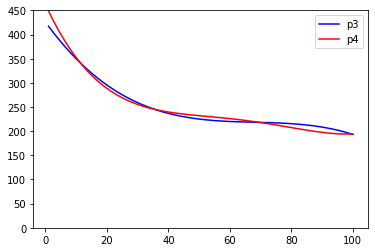

In [73]:
x=number['N']
y=number['p3']
y1=number['p4']
plt.plot(x,y,'-b',label='p3')
plt.plot(x,y1,'-r',label='p4')
plt.ylim(0,450)
plt.legend()
plt.show()

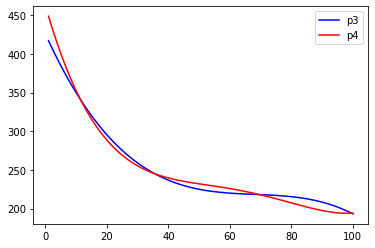

In [74]:
x=number['N']
y=number['p3']
y1=number['p4']
plt.plot(x,y,'-b',label='p3')
plt.plot(x,y1,'-r',label='p4')
plt.legend()
plt.show()